In [1]:
import pandas as pd
import geopandas as gpd

from tqdm import tqdm_notebook

import os

import matplotlib.pyplot as plt
%matplotlib inline

data_path = '/home/fterroso/data/'

/home/fterroso/python/lib/python3.6/site-packages/geopandas/_compat.py:88: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


## Read mobility areas

In [2]:
def read_spain_mobility_areas_fn(lite_version=True):
    #read MA geometry file
    gdf_ = gpd.read_file(data_path + 'Spain-mobility-areas/celdas_marzo_2020.shp', encoding='UTF-8')
    gdf_= gdf_.set_index('OBJECTID')
    gdf_ = gdf_.to_crs({'init': 'epsg:25830'}) 
    if lite_version:
        gdf_ = gdf_.drop(columns=['SUM_POB_AS','Shape_Leng', 'MOMENTO_TE', 'MOMENTO__1', 'MOMENTO__2', 'MOMENTO__3', 'MOMENTO__4', 'MOMENTO__5', 'MOMENTO__6', 'MOMENTO__7', 'MOMENTO__8', 'MOMENTO__9', 'MOMENTO_10', 'MOMENTO_11', 'NOMBRE_CEL', 'MOMENTO_12', 'MOMENTO_13', 'MOMENTO_14', 'MOMENTO_15', 'MOMENTO_16', 'MOMENTO_17', 'MOMENTO_18', 'MOMENTO_19', 'MOMENTO_20', 'MOMENTO_21', 'MOMENTO_22', 'MOMENTO_23', 'Shape_Le_1'])
    
    #read MA description file
    df_ = pd.read_csv(data_path + 'Spain-mobility-areas/areas_de_movilidad_y_poblacion_a_1_ene_2019.csv', 
                  sep=';', encoding="ISO-8859-1")
    df_ = df_.drop_duplicates('ID_GRUPO', keep='first')
    df_ = df_['CPRO NPRO ID_GRUPO POB_GRUPO LITERAL_GRUPO'.split()]
    
    gdf_ = gdf_.merge(df_, how='left', on='ID_GRUPO')
    
    return gdf_

In [3]:
mob_areas_gdf = read_spain_mobility_areas_fn()

/home/fterroso/python/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [4]:
mob_areas_gdf.crs

<Projected CRS: EPSG:25830>
Name: ETRS89 / UTM zone 30N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe - 6°W to 0°W and ETRS89 by country
- bounds: (-6.0, 35.26, 0.0, 80.53)
Coordinate Operation:
- name: UTM zone 30N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [5]:
mob_areas_gdf.head(5)

,ID_GRUPO,Shape_Area,geometry,CPRO,NPRO,POB_GRUPO,LITERAL_GRUPO
0,001A,8.237841e+07,"POLYGON ((696312.177 4215979.057, 696312.181 4...",3,Alicante,7.903,"Montesinos, Los y Algorfa"
1,001B,1.452931e+08,"POLYGON ((898992.611 4638407.292, 898992.603 4...",8,Barcelona,14.529,Sant Joan de Vilatorrada y otros municipios
2,001M,4.756526e+08,"POLYGON ((494216.778 4445259.734, 494216.385 4...",28,Madrid,5.149,Fuentidueña de Tajo y otros municipios
3,001S,1.436231e+09,"POLYGON ((240629.599 4209416.214, 240629.597 4...",41,Sevilla,6.733,"Real de la Jara, El y otros municipios"
4,001V,1.126422e+07,"POLYGON ((748392.315 4317155.513, 748392.289 4...",46,Valencia/Valéncia,6.277,Daimús y otros municipios


In [6]:
mob_areas_gdf.tail(5)

,ID_GRUPO,Shape_Area,geometry,CPRO,NPRO,POB_GRUPO,LITERAL_GRUPO
3209,44AL,2.237288e+08,"POLYGON ((525124.023 4074358.142, 525195.022 4...",4,Almería,25.195,"Ejido, El (sección 012 y otras secciones del d..."
3210,45AL,1.247035e+08,"POLYGON ((515809.802 4073593.546, 515809.802 4...",4,Almería,26.944,"Ejido, El (sección 018 y otras secciones del d..."
3211,53MA,4.760701e+06,"POLYGON ((353983.602 4045940.456, 354014.128 4...",29,Málaga,30.970,Mijas (sección 019 y otras secciones del distr...
3212,79MA,1.675716e+08,"POLYGON ((357177.076 4052999.646, 357196.076 4...",29,Málaga,24.977,Mijas (sección 026 y otras secciones del distr...
3213,80MA,5.881942e+07,"POLYGON ((351704.362 4045521.174, 351719.860 4...",29,Málaga,26.795,Mijas (sección 011 y otras secciones del distr...


In [7]:
mob_areas_gdf.shape

(3214, 7)

In [8]:
mob_areas_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   ID_GRUPO       3214 non-null   object  
 1   Shape_Area     3214 non-null   float64 
 2   geometry       3214 non-null   geometry
 3   CPRO           3214 non-null   int64   
 4   NPRO           3214 non-null   object  
 5   POB_GRUPO      3214 non-null   float64 
 6   LITERAL_GRUPO  3214 non-null   object  
dtypes: float64(2), geometry(1), int64(1), object(3)
memory usage: 200.9+ KB


In [9]:
mob_areas_gdf['POB_GRUPO'].min()

1.4169999999999998

In [10]:
mob_areas_gdf['POB_GRUPO'].max()

70.195

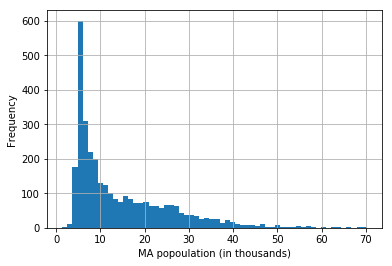

In [11]:
ax= mob_areas_gdf['POB_GRUPO'].plot.hist(bins=60, grid=True);
ax.set_xlabel("MA popoulation (in thousands)")
#plt.tight_layout()
plt.savefig(os.path.join('figs', 'twt_covid_vs_outgoing_trips_v2.png'))

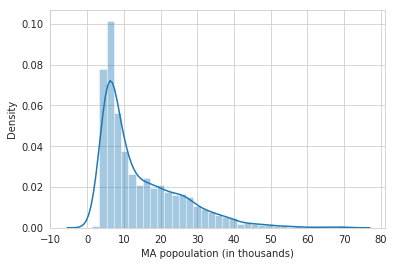

In [14]:
import seaborn as sns
import numpy as np

sns.set_style("whitegrid");
ax=sns.distplot(mob_areas_gdf["POB_GRUPO"], kde=True);
ax.set_xlabel("MA popoulation (in thousands)");
ax.set_xticks(np.arange(-10,90,10))
ax.set_ylabel("Density");
plt.savefig(os.path.join('figs', 'ma_pop_dist.png'))

### Plot info about provinces

In [40]:
ax=ma_nocanary_gdf = mob_areas_gdf[(~mob_areas_gdf['ID_GRUPO'].str.contains('GC')) & (~mob_areas_gdf['ID_GRUPO'].str.contains('TF'))]

In [43]:
province_gdf = gpd.read_file(os.path.join('data', 'provinces_with_code.geojson'), encoding='utf-8').to_crs({'init': 'epsg:25830'})
province_gdf.head()

/home/fterroso/python/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,NATCODE,NAMEUNIT,CODEUNIT,geometry
0,34104600000,València/Valencia,46,"MULTIPOLYGON (((653037.661 4429500.236, 652229..."
1,34084500000,Toledo,45,"POLYGON ((294238.465 4416957.428, 294235.467 4..."
2,34024400000,Teruel,44,"POLYGON ((765333.011 4512252.351, 764732.031 4..."
3,34094300000,Tarragona,43,"MULTIPOLYGON (((813560.435 4504876.753, 813537..."
4,34074200000,Soria,42,"POLYGON ((583890.589 4603311.305, 583939.589 4..."


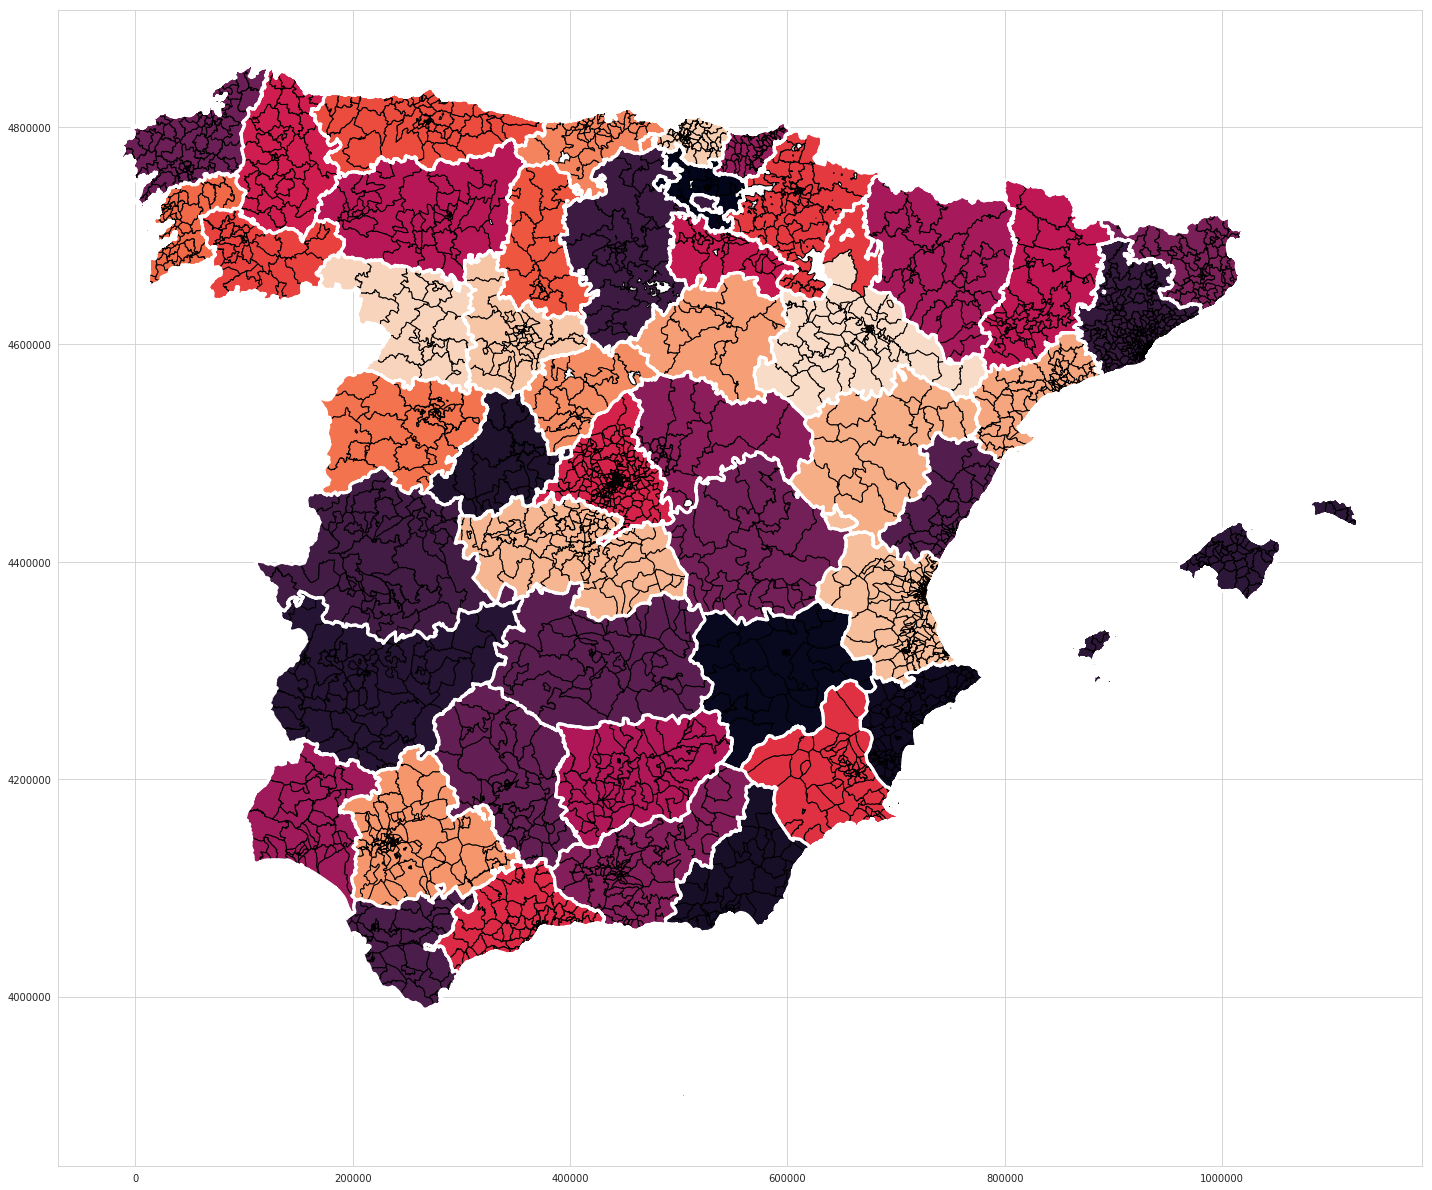

In [50]:
ax= ma_nocanary_gdf.plot(column='CPRO',figsize=(20,30), edgecolor='k');
province_gdf.geometry.boundary.plot(color=None,edgecolor='white', linewidth = 3, ax=ax); 
plt.tight_layout();
plt.savefig(os.path.join('figs', 'prov_raw_map.png'),bbox_inches='tight')

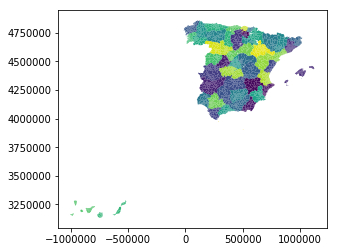

In [12]:
mob_areas_gdf.plot(column='CPRO');

In [19]:
prov_pob_df = mob_areas_gdf.groupby('NPRO').agg({'POB_GRUPO':'sum'})

In [20]:
prov_pob_df.head()

,POB_GRUPO
NPRO,
Albacete,388.167
Alicante,1858.683
Almería,716.820
Araba/Álava,331.549
Asturias,1022.800


In [22]:
import seaborn as sns

/home/fterroso/python/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


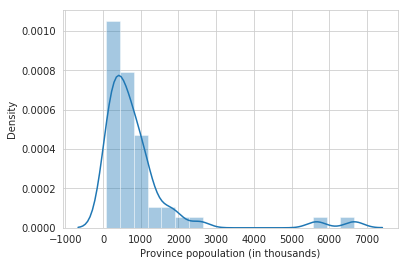

In [37]:
sns.set_style("whitegrid");
ax=sns.distplot(prov_pob_df["POB_GRUPO"], kde=True);
ax.set_xlabel("Province popoulation (in thousands)");
ax.set_ylabel("Density");
plt.savefig(os.path.join('figs', 'prov_pop_dist.png'))

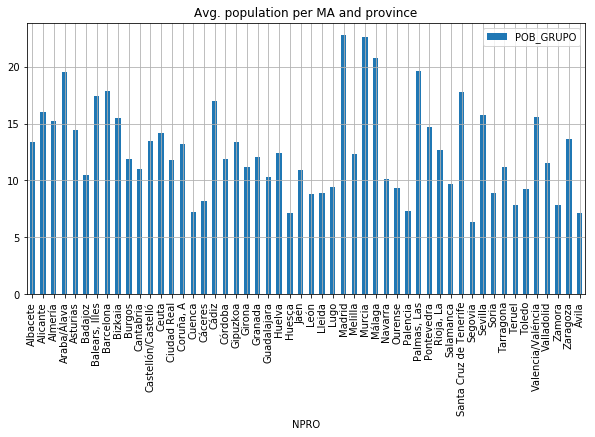

In [25]:
ax= mob_areas_gdf.groupby('NPRO').agg({'POB_GRUPO':'mean'}).plot(kind='bar', 
                                                             grid=True, 
                                                             figsize=(10,5),
                                                            title='Avg. population per MA and province');


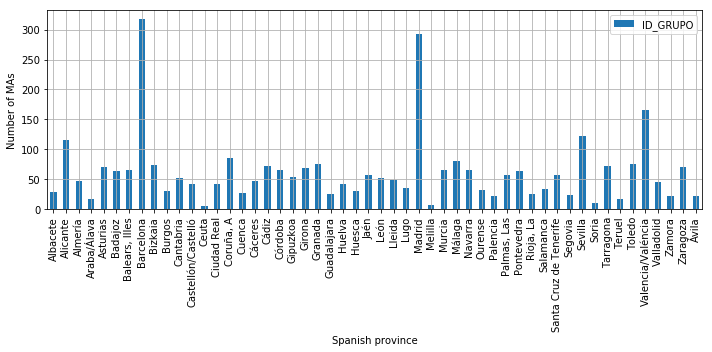

In [35]:
ax=mob_areas_gdf.groupby('NPRO').agg({'ID_GRUPO': 'count'}).plot(kind='bar', 
                                                              grid=True, 
                                                              figsize=(10,5));
ax.set_xlabel("Spanish province");
ax.set_ylabel("Number of MAs");
plt.tight_layout()
plt.savefig(os.path.join('figs', 'num_mas_per_province.png'))

In [27]:
mob_areas_gdf.to_file(os.path.join('data', 'mov_areas_enriched.geojson'), driver="GeoJSON")

## Compose distance matrix among MAs

In [28]:
ma_gdf = gpd.read_file(os.path.join('data', 'mov_areas_enriched.geojson'), encoding="ISO-8859-1",)
ma_ids = ma_gdf['ID_GRUPO'].unique().tolist()

In [29]:
ma_gdf.head()

,ID_GRUPO,Shape_Area,CPRO,NPRO,POB_GRUPO,LITERAL_GRUPO,geometry
0,001A,8.237841e+07,3,Alicante,7.903,"Montesinos, Los y Algorfa","POLYGON ((696312.177 4215979.057, 696312.181 4..."
1,001B,1.452931e+08,8,Barcelona,14.529,Sant Joan de Vilatorrada y otros municipios,"POLYGON ((898992.611 4638407.292, 898992.603 4..."
2,001M,4.756526e+08,28,Madrid,5.149,Fuentidueña de Tajo y otros municipios,"POLYGON ((494216.778 4445259.734, 494216.385 4..."
3,001S,1.436231e+09,41,Sevilla,6.733,"Real de la Jara, El y otros municipios","POLYGON ((240629.599 4209416.214, 240629.597 4..."
4,001V,1.126422e+07,46,Valencia/Valéncia,6.277,Daimús y otros municipios,"POLYGON ((748392.315 4317155.513, 748392.289 4..."


In [30]:
distance_od_df = pd.DataFrame(0,columns=ma_ids, index=ma_ids)

In [31]:
import itertools

In [32]:
for o_ma, d_ma in tqdm_notebook(itertools.combinations(ma_ids, r=2)):                    
    o_centroid = ma_gdf[ma_gdf['ID_GRUPO']==o_ma]['geometry'].iloc[0].centroid
    d_centroid = ma_gdf[ma_gdf['ID_GRUPO']==d_ma]['geometry'].iloc[0].centroid
    dist = o_centroid.distance(d_centroid)/1000
    distance_od_df.loc[o_ma, d_ma]= dist
    distance_od_df.loc[d_ma,o_ma]= dist

KeyboardInterrupt: 

In [ ]:
distance_od_df.head()

In [ ]:
distance_od_df.to_csv(os.path.join('data', 'ma_distances.csv'))

In [ ]:
print("That's all folks")